# Exercice Decision Tree Classifier 

0. Importez les librairies usuelles 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. Importez les data et les afficher

In [2]:
dataset = pd.read_csv("bl.txt")

In [3]:
dataset.head()

,balance,left_weight,left_distance,right_weight,right_distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


2. Afficher un résumé des statistiques descriptives

In [4]:
dataset.describe()

,left_weight,left_distance,right_weight,right_distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


3. Afficher la shape du dataset

In [5]:
dataset.shape

(625, 5)

4. Séparer le dataset en deux array ```X``` et ```Y```

```X``` désignant les variables explicatives / features & ```Y``` la variable cible / target

In [5]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

5. Spliter le dataset (70/30) avec un random_state=42

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y)

6. Instancier un 'DecisionTreeClassifier' avec un critère de décision GINI

In [7]:
from sklearn.tree import DecisionTreeClassifier

classifier_gini = DecisionTreeClassifier(criterion="gini")
classifier_gini.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

7. Affichez votre arbre de decision

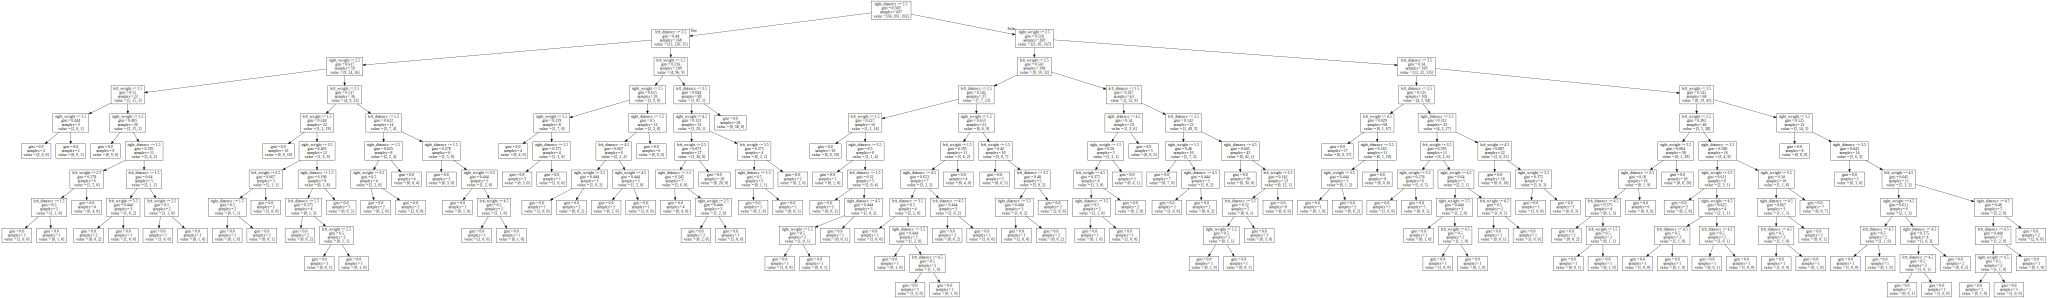

In [8]:
import graphviz 
from sklearn.tree import export_graphviz

dot_data = export_graphviz(classifier_gini, out_file=None, feature_names= X.columns) 

graph = graphviz.Source(dot_data) 
graph

In [9]:
import pydotplus

graph_pdf = pydotplus.graph_from_dot_data(dot_data)
graph_pdf.write_pdf('tree.pdf')

True

8. Instancier un 'DecisionTreeClassifier' avec un critère de décision "d'information gain"

In [10]:
from sklearn.tree import DecisionTreeClassifier

classifier_entropy = DecisionTreeClassifier(criterion="entropy")
classifier_entropy.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

9. Afficher votre arbre

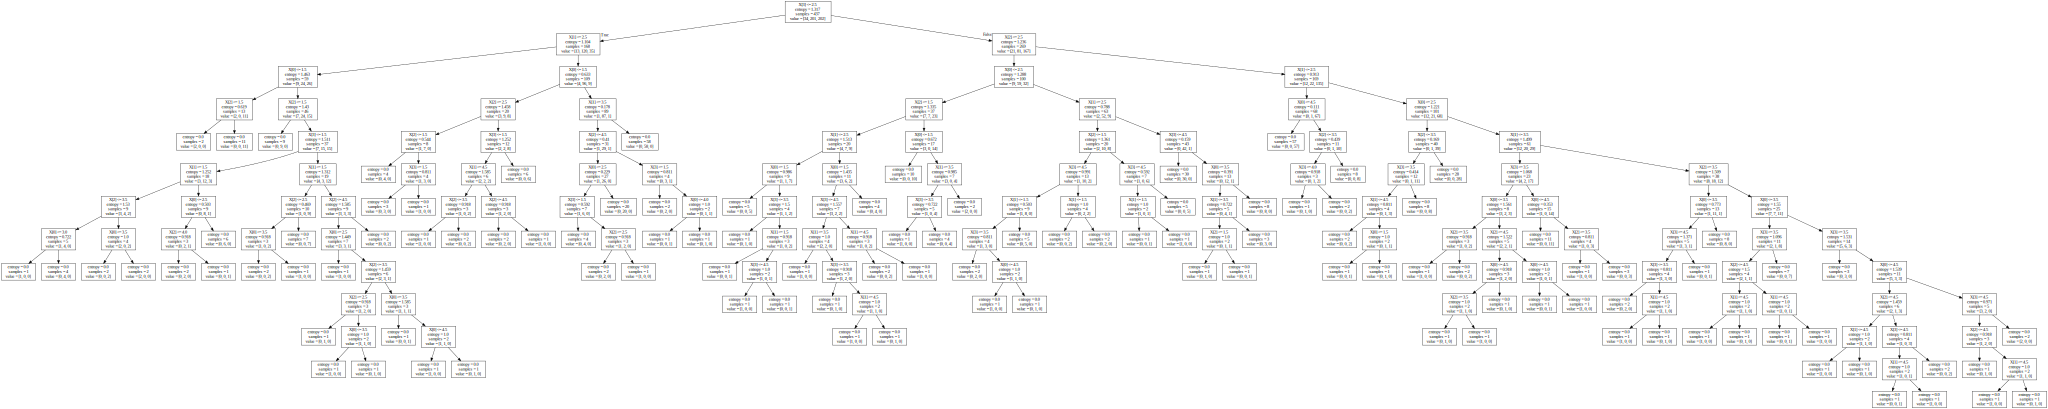

In [11]:
dot_data = export_graphviz(classifier_entropy, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

10. Vérifier que l'individue X_new est bien classé "Left"

où X_new est l'observation [4, 4, 3, 3]

In [12]:
X_new = np.array([[4,4,3,3]])
classifier_entropy.predict(X_new)

array(['L'], dtype=object)

11. Effectuer une prediction du classifieur GINI sur l'ensemble de test

In [13]:
y_pred_gini = classifier_gini.predict(X_test)
y_pred_gini

array(['R', 'L', 'B', 'R', 'L', 'R', 'R', 'R', 'B', 'L', 'R', 'R', 'B',
       'B', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'L', 'R', 'R', 'B',
       'R', 'B', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'B', 'R', 'R',
       'R', 'L', 'B', 'L', 'L', 'R', 'B', 'R', 'R', 'R', 'L', 'B', 'L',
       'L', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R',
       'L', 'B', 'L', 'L', 'B', 'L', 'L', 'L', 'R', 'L', 'L', 'R', 'L',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L',
       'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'L',
       'L', 'L', 'L', 'R', 'B', 'L', 'R', 'L', 'R', 'L', 'L', 'B', 'R',
       'B', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'B', 'B', 'L', 'B',
       'R', 'L', 'R', 'R', 'B', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R',
       'L', 'L', 'L', 'R', 'R', 'B', 'L', 'R', 'R', 'B', 'L', 'L', 'R',
       'R', 'R', 'R', 'R', 'B', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'B',
       'L', 'R', 'B', 'L', 'L', 'B', 'L', 'R', 'B', 'L', 'B', 'R

12. Effectuer une prediction du classifieur ENTROPY sur l'ensemble de test

In [14]:
y_pred_entropy = classifier_entropy.predict(X_test)
y_pred_entropy

array(['R', 'L', 'R', 'R', 'L', 'R', 'R', 'R', 'B', 'L', 'R', 'R', 'B',
       'B', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'L', 'R', 'R', 'B',
       'R', 'B', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'B', 'R', 'R',
       'R', 'L', 'B', 'R', 'L', 'L', 'B', 'R', 'R', 'R', 'L', 'B', 'L',
       'L', 'L', 'R', 'L', 'R', 'B', 'L', 'R', 'L', 'L', 'R', 'L', 'R',
       'L', 'B', 'L', 'L', 'B', 'B', 'L', 'L', 'R', 'L', 'L', 'R', 'L',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'B', 'L', 'L',
       'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'L',
       'L', 'L', 'L', 'R', 'B', 'L', 'R', 'L', 'R', 'L', 'B', 'R', 'R',
       'B', 'L', 'R', 'L', 'L', 'R', 'R', 'L', 'R', 'B', 'R', 'L', 'B',
       'R', 'L', 'R', 'R', 'B', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R',
       'L', 'L', 'L', 'B', 'R', 'B', 'L', 'R', 'R', 'B', 'L', 'L', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'B', 'B',
       'L', 'R', 'L', 'L', 'L', 'B', 'L', 'R', 'B', 'L', 'B', 'R

12. Effectuer une comparaison entre les classifieurs GINI & ENTROPY

On prendra pour temoin le dataset de test

In [15]:
count = 0
for i in range(0, len(y_pred_gini)):
  
  if y_pred_gini[i] != y_pred_entropy[i]:
    count+= 1
    

print("Sur l'ensemble de test, il y a {} éléments classés différemment".format(count))
print("Soit {}% de différence".format(np.round(count/len(y_pred_gini),3)*100))

Sur l'ensemble de test, il y a 16 éléments classés différemment
Soit 8.5% de différence


13. Donner l'accuracy du classifieur GINI

In [16]:
classifier_gini.score(X_test,y_test)

0.75

14. Donner l'accuracy du classifieur Entropy 

In [17]:
classifier_entropy.score(X_test,y_test)

0.7446808510638298

15. Afficher la matrice de confusion du classifieur GINI, que constatez-vous ?

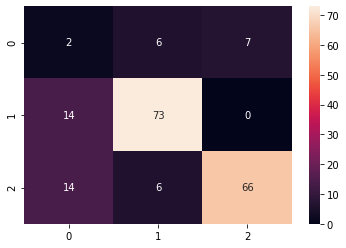

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gini)
sns.heatmap(cm, annot=True, fmt="d")



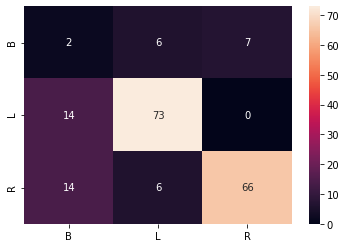

In [19]:
sns.heatmap(cm, annot=True, xticklabels=y_test.sort_values().unique(), yticklabels=y_test.sort_values().unique())

16. Affichez maintenant les classification report de vos deux modèles, selon vous les modèles sont ils performants ? Sont ils sur-appris ?

In [ ]:
Rappel : 

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1 Score = 2 * ( (Precision * Recall) / (Precision + Recall) )

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=classifier_entropy.predict(X_test)))

              precision    recall  f1-score   support

           B       0.06      0.13      0.09        15
           L       0.87      0.83      0.85        87
           R       0.89      0.77      0.82        86

    accuracy                           0.74       188
   macro avg       0.61      0.58      0.59       188
weighted avg       0.81      0.74      0.78       188



In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=classifier_gini.predict(X_test)))

              precision    recall  f1-score   support

           B       0.07      0.13      0.09        15
           L       0.86      0.84      0.85        87
           R       0.90      0.77      0.83        86

    accuracy                           0.75       188
   macro avg       0.61      0.58      0.59       188
weighted avg       0.82      0.75      0.78       188



In [23]:
print(classification_report(y_true=y_train, y_pred=classifier_entropy.predict(X_train)))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00        34
           L       1.00      1.00      1.00       201
           R       1.00      1.00      1.00       202

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437



In [24]:
print(classification_report(y_true=y_train, y_pred=classifier_gini.predict(X_train)))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00        34
           L       1.00      1.00      1.00       201
           R       1.00      1.00      1.00       202

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437



17. Comment lutter contre le sur-apprentissage dans le cas des arbres de décisions. Tentez de trouver un ensemble d'hyper-paramètres qui permettent d'améliorer le score de test et limiter le sur-apprentissage.

In [25]:
from sklearn.model_selection import GridSearchCV

rtc = DecisionTreeClassifier()
params = {'max_depth' : np.arange(1,10),
         'min_samples_leaf' : [1, 5, 10, 20]}

grid =  GridSearchCV(estimator=rtc, param_grid= params, cv = 10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
   

In [26]:
grid.best_params_

{'max_depth': 4, 'min_samples_leaf': 1}

In [27]:
grid.best_estimator_.score(X_test, y_test)

0.7712765957446809

In [28]:
grid.best_estimator_.score(X_train, y_train)

0.8443935926773455

In [29]:
print(classification_report(y_test,grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           B       0.20      0.07      0.10        15
           L       0.80      0.83      0.81        87
           R       0.77      0.84      0.80        86

    accuracy                           0.77       188
   macro avg       0.59      0.58      0.57       188
weighted avg       0.74      0.77      0.75       188



In [30]:
confusion_matrix?

In [30]:
y.value_counts()

L    288
R    288
B     49
Name: balance, dtype: int64

In [31]:
dataset.groupby('balance').mean()

,left_weight,left_distance,right_weight,right_distance
balance,,,,
B,2.938776,2.938776,2.938776,2.938776
L,3.611111,3.611111,2.399306,2.399306
R,2.399306,2.399306,3.611111,3.611111


In [32]:
dataset[dataset['balance'] == 'B']

,balance,left_weight,left_distance,right_weight,right_distance
0,B,1,1,1,1
26,B,1,2,1,2
30,B,1,2,2,1
52,B,1,3,1,3
60,B,1,3,3,1
78,B,1,4,1,4
81,B,1,4,2,2
90,B,1,4,4,1
104,B,1,5,1,5
120,B,1,5,5,1


18. On créé de nouvelles variables afin d'améliorer les performances

In [33]:
dataset['left_prod'] = dataset['left_weight'] * dataset['left_distance']
dataset['right_prod'] = dataset['right_weight'] * dataset['right_distance']
dataset['balanced'] = dataset['right_prod'] - dataset['left_prod']

In [34]:
dataset[dataset['balance'] == 'B']

,balance,left_weight,left_distance,right_weight,right_distance,left_prod,right_prod,balanced
0,B,1,1,1,1,1,1,0
26,B,1,2,1,2,2,2,0
30,B,1,2,2,1,2,2,0
52,B,1,3,1,3,3,3,0
60,B,1,3,3,1,3,3,0
78,B,1,4,1,4,4,4,0
81,B,1,4,2,2,4,4,0
90,B,1,4,4,1,4,4,0
104,B,1,5,1,5,5,5,0
120,B,1,5,5,1,5,5,0


In [35]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y)

In [37]:
from sklearn.tree import DecisionTreeClassifier
classifier_gini = DecisionTreeClassifier(criterion="gini")
classifier_gini.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
print(classification_report(y_train, classifier_gini.predict(X_train)))
print(classification_report(y_test, classifier_gini.predict(X_test)))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00        34
           L       1.00      1.00      1.00       201
           R       1.00      1.00      1.00       202

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437

              precision    recall  f1-score   support

           B       1.00      1.00      1.00        15
           L       1.00      1.00      1.00        87
           R       1.00      1.00      1.00        86

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188

